In [24]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve


In [18]:
# Leer los datos
ds = pd.read_csv("C:\\Users\\rober\\OneDrive\\Documentos\\UNAD\SEXTO SEMESTRE\\ANÁLISIS DE DATOS\\TAREA4\\Cleaned-Data.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [19]:
ds.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [20]:
# Definir características y objetivos
feature_cols = ['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
                'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
                'Runny-Nose', 'Diarrhea', 'None_Experiencing']
objetive_col1 = 'Severity_None'
objetive_col2 = 'Severity_Mild'
objetive_col3 = 'Severity_Moderate'
objetive_col4 = 'Severity_Severe'

X = ds[feature_cols]
y1 = ds[objetive_col1]
y2 = ds[objetive_col2]
y3 = ds[objetive_col3]
y4 = ds[objetive_col4]


In [21]:
# Función para evaluar el rendimiento del modelo y visualizar resultados
def evaluate_model(X_train, X_test, y_train, y_test, objetive_col):
    nb = MultinomialNB()
    nb.fit(X_train, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = nb.predict(X_test)

    # Métricas de rendimiento
    print('Accuracy of Naive Bayes classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    # Classification Report
    print('\nClassification Report:\n', classification_report(y_test, y_pred))
    print('=' * 40)

In [22]:
# División de los datos para cada objetivo
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size=0.3, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.3, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size=0.3, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y4, test_size=0.3, random_state=0)


Accuracy of Naive Bayes classifier on test set: 0.75
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


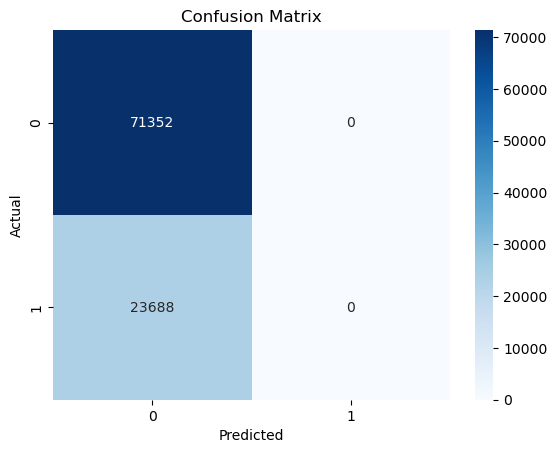

C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     71352
           1       0.00      0.00      0.00     23688

    accuracy                           0.75     95040
   macro avg       0.38      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040

Accuracy of Naive Bayes classifier on test set: 0.75
Precision: 0.00


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.00
F1 Score: 0.00


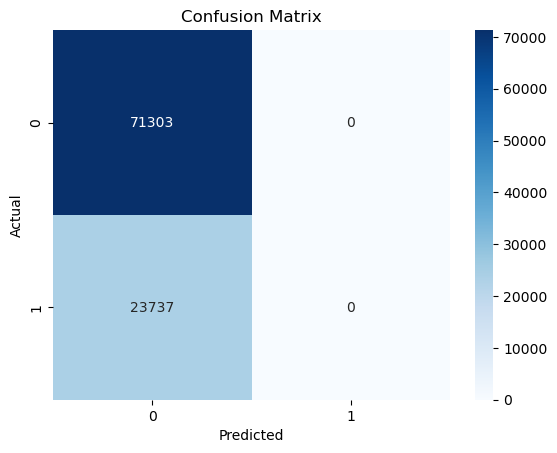

C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     71303
           1       0.00      0.00      0.00     23737

    accuracy                           0.75     95040
   macro avg       0.38      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040

Accuracy of Naive Bayes classifier on test set: 0.75
Precision: 0.00
Recall: 0.00


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.00


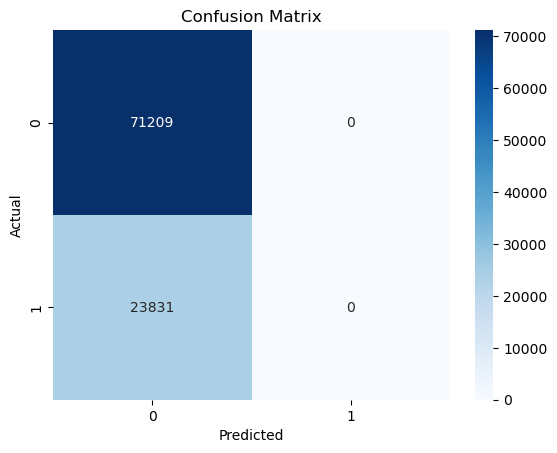

C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     71209
           1       0.00      0.00      0.00     23831

    accuracy                           0.75     95040
   macro avg       0.37      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040

Accuracy of Naive Bayes classifier on test set: 0.75
Precision: 0.00
Recall: 0.00


C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.00


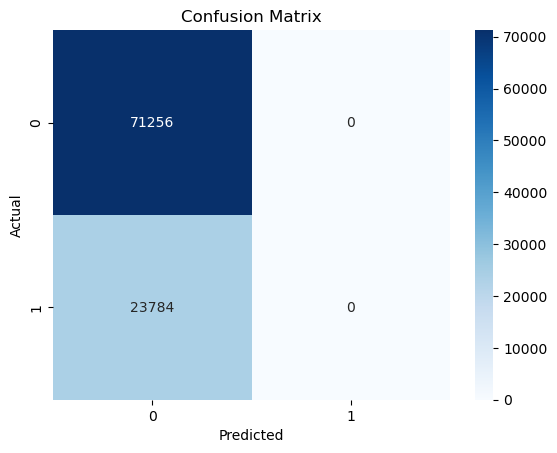


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     71256
           1       0.00      0.00      0.00     23784

    accuracy                           0.75     95040
   macro avg       0.37      0.50      0.43     95040
weighted avg       0.56      0.75      0.64     95040



C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rober\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Evaluación para cada objetivo
evaluate_model(X_train1, X_test1, y_train1, y_test1, objetive_col1)
evaluate_model(X_train2, X_test2, y_train2, y_test2, objetive_col2)
evaluate_model(X_train3, X_test3, y_train3, y_test3, objetive_col3)
evaluate_model(X_train4, X_test4, y_train4, y_test4, objetive_col4)